In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import subprocess

In [2]:
def run_test(sps):
    # you might need to change this for your system
    subprocess.run(['./test', str(sps)],
                   env = {'LD_LIBRARY_PATH' : '/home/daniel/debian_testing_chroot/usr/lib/x86_64-linux-gnu/'})


In [3]:
sps = 4.1
run_test(sps)
interp_output = np.fromfile('interp_output.c64', dtype = 'complex64')
interp_derivative = np.fromfile('interp_derivative.c64', dtype = 'complex64')
ted_error = np.fromfile('ted_error.f32', dtype = 'float32')
n_poly = 100
sym = np.arange(interp_output.size)/(n_poly*sps)

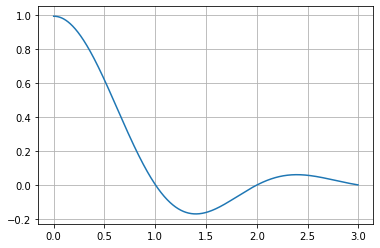

In [4]:
plt.plot(sym, interp_output.real)
plt.grid()

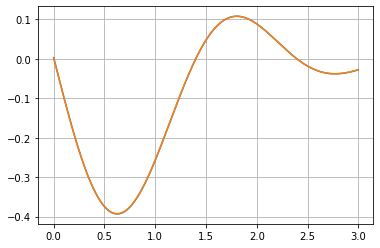

In [5]:
plt.plot(sym, interp_derivative.real)
derivative_scale = np.average(interp_derivative.real[:-1]/np.diff(interp_output.real))
plt.plot(sym[:-1], np.diff(interp_output.real)*derivative_scale)
plt.grid()

In [6]:
derivative_scale

118.28524

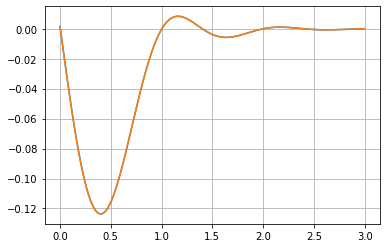

In [7]:
plt.plot(sym, ted_error)
plt.plot(sym[:-1], 0.5*np.diff(interp_output.real)*derivative_scale*interp_output.real[:-1])
plt.grid()

In [8]:
def compute_K_ted(sps):
    K_ted = np.empty_like(sps)
    for j,s in enumerate(sps):
        run_test(s)
        ted_error = np.fromfile('ted_error.f32', dtype = 'float32')
        K_ted[j] = (ted_error[0]-ted_error[1])*n_poly
    return K_ted

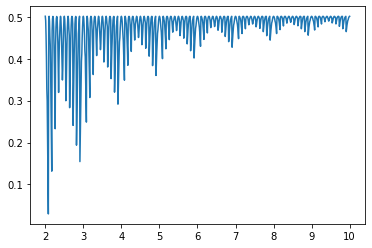

In [9]:
sps = np.arange(2,10.01,0.01)
plt.plot(sps, compute_K_ted(sps)*sps)

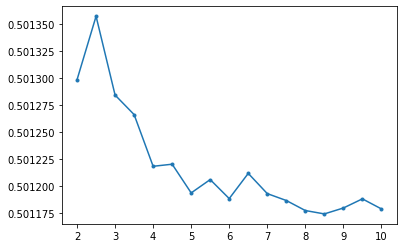

In [10]:
sps = np.arange(2,10.5,0.5)
plt.plot(sps, compute_K_ted(sps)*sps, '.-')

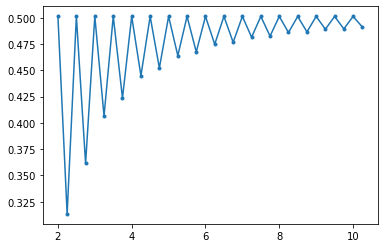

In [11]:
sps = np.arange(2,10.5,0.25)
plt.plot(sps, compute_K_ted(sps)*sps, '.-')